In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import input_data

/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
mnist = input_data.read_data_sets('mnist/',one_hot=True)
total_epoch = 100
batch_size = 100
learning_rate = 0.0002
n_hidden = 256
n_input = 28*28
n_noise = 128

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [3]:
#Descriminator网络输入图片形状
x = tf.placeholder(tf.float32,[None,n_input])
#Generator网络输入的是噪声
z = tf.placeholder(tf.float32,[None,n_noise])

#Generator网络的权重和偏置
Generator_param={
    'gw_1':tf.Variable(tf.random_normal([n_noise,n_hidden],stddev=0.1)),
    'gb_1':tf.Variable(tf.zeros([n_hidden])),
    'gw_2':tf.Variable(tf.random_normal([n_hidden,n_input],stddev=0.1)),
    'gb_2':tf.Variable(tf.zeros([n_input]))
}

#Discriminator网络权重和偏置
Discriminator_param={
    'dw_1':tf.Variable(tf.random_normal([n_input,n_hidden],stddev=0.1)),
    'db_1':tf.Variable(tf.zeros([n_hidden])),
    'dw_2':tf.Variable(tf.random_normal([n_hidden,1],stddev=0.1)),
    'db_2':tf.Variable(tf.zeros([1]))
}

In [4]:
#构建Generator网络
def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z,Generator_param['gw_1'])+Generator_param['gb_1'])
    output = tf.nn.sigmoid(tf.matmul(hidden,Generator_param['gw_2'])+Generator_param['gb_2'])
    return output

#构建Discriminator网络
def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs,Discriminator_param['dw_1'])+Discriminator_param['db_1'])
    output = tf.nn.sigmoid(tf.matmul(hidden,Discriminator_param['dw_2'])+Discriminator_param['db_2'])
    return output

In [5]:
#生成网络根据噪声生成一张图片
generator_output = generator(z)
#判别网络根据生成网络生成的图片片别其真假概率
discriminator_pred = discriminator(generator_output)
#判别网络根据真实图片判别其真假概率
discriminator_real = discriminator(x)

#生成网络loss
generator_loss = tf.reduce_mean(tf.log(discriminator_pred))
#判别网络loss
discriminator_loss = tf.reduce_mean(tf.log(discriminator_real)+tf.log(1 - discriminator_pred))

generator_param_list=[Generator_param['gw_1'],Generator_param['gb_1'],Generator_param['gw_2'],Generator_param['gb_2']]
discriminator_param_list=[Discriminator_param['dw_1'],Discriminator_param['db_1'],Discriminator_param['dw_2'],Discriminator_param['db_2']]

generator_train = tf.train.AdamOptimizer(learning_rate).minimize(-generator_loss,var_list=generator_param_list)
discriminator_train = tf.train.AdamOptimizer(learning_rate).minimize(-discriminator_loss,var_list=discriminator_param_list)

epoch:  0 --generator_loss: -3.5057 --discriminator_loss: -0.1303


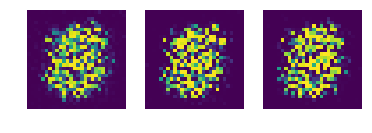

epoch:  1 --generator_loss: -3.4735 --discriminator_loss: -0.1638


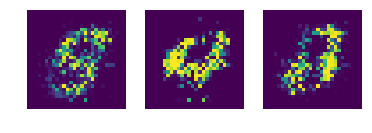

epoch:  2 --generator_loss: -3.2589 --discriminator_loss: -0.3839


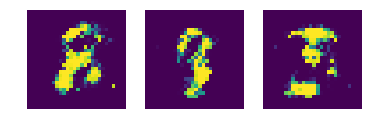

epoch:  3 --generator_loss: -2.7672 --discriminator_loss: -0.4363


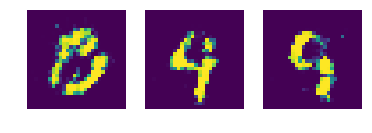

epoch:  4 --generator_loss: -2.8735 --discriminator_loss: -0.4111


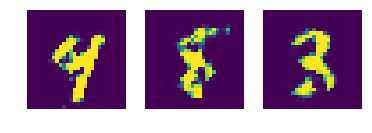

epoch:  5 --generator_loss: -2.7498 --discriminator_loss: -0.5792


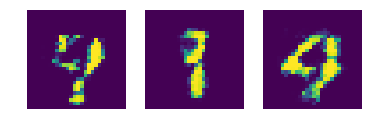

epoch:  6 --generator_loss: -2.6558 --discriminator_loss: -0.7223


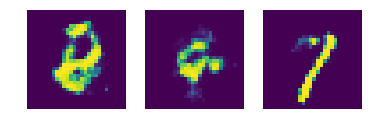

epoch:  7 --generator_loss: -2.5428 --discriminator_loss: -0.3971


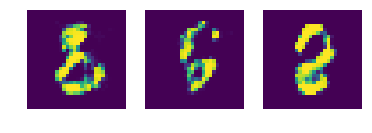

epoch:  8 --generator_loss: -2.7040 --discriminator_loss: -0.6642


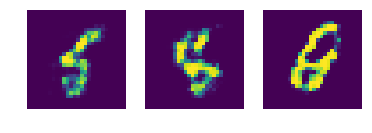

epoch:  9 --generator_loss: -2.5361 --discriminator_loss: -0.4170


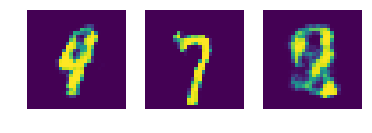

In [7]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    total_batch = int(mnist.train.num_examples/batch_size)
    generator_c,discriminator_c = 0,0
    #开始交互模式
    plt.ion()
    for epoch in range(total_epoch):
        for i in range(total_batch):
            batch_x,batch_y = mnist.train.next_batch(batch_size)
            noise = np.random.normal(size=(batch_size,n_noise))
            _,generator_c = sess.run([generator_train,generator_loss],feed_dict={z:noise})
            _,discriminator_c = sess.run([discriminator_train,discriminator_loss],feed_dict={x:batch_x,z:noise})
        if epoch % 10 ==0:
            print('epoch: ',int(epoch/10),'--generator_loss: %.4f' %generator_c,'--discriminator_loss: %.4f' %discriminator_c)

        #图片显示
        if epoch % 10 == 0:
            new_batch = 3
            noise = np.random.normal(size=(new_batch,n_noise))
            #生成图像
            samples = sess.run(generator_output,feed_dict={z:noise})
            fig,a = plt.subplots(1,new_batch,figsize=(new_batch*2,2))
            for i in range(new_batch):
                a[i].clear()
                a[i].set_axis_off()
                a[i].imshow(np.reshape(samples[i],(28,28)))
            plt.draw()
            plt.pause(0.1)
    
    
#         if epoch % 10 == 0:
#             new_batch = 10
#             noise = np.random.normal(size=(new_batch,n_noise))
#             #生成图像
#             samples = sess.run(generator_output,feed_dict={z:noise})
#             fig,a = plt.subplots(1,new_batch,figsize=(new_batch,1))
#             for i in range(new_batch):
#                 a[i].set_axis_off()
#                 a[i].imshow(np.reshape(samples[i],(28,28)))
#             plt.savefig('samples/%i.png' %int(epoch/10))
#             plt.close(fig)
    plt.ioff()